In [1]:
import numpy as np
import pandas as pd

In [2]:
cal_df = pd.read_csv('calendar.csv')
cal_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [3]:
np.array(cal_df)

array([['2011-01-29', 11101, 'Saturday', ..., 0, 0, 0],
       ['2011-01-30', 11101, 'Sunday', ..., 0, 0, 0],
       ['2011-01-31', 11101, 'Monday', ..., 0, 0, 0],
       ...,
       ['2016-06-17', 11620, 'Friday', ..., 0, 0, 0],
       ['2016-06-18', 11621, 'Saturday', ..., 0, 0, 0],
       ['2016-06-19', 11621, 'Sunday', ..., 0, 0, 0]], dtype=object)

In [5]:
sales_df = pd.read_csv('sales_train_validation.csv')
sales_df

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [4]:
sell_prices_df = pd.read_csv('sell_prices.csv')
sell_prices_df.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [19]:
# data stack example
a = np.array((1,2,3,5,6,7)).reshape(2,3)
b = np.array((2,3,4,9,10,11)).reshape(2,3)
np.stack((a,b))


array([[[ 1,  2,  3],
        [ 5,  6,  7]],

       [[ 2,  3,  4],
        [ 9, 10, 11]]])

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras import models, layers, callbacks, Input

Using TensorFlow backend.


In [12]:
def shape_ts_data(df, sample_size, start, end, step):
    np_arr_list = []
    for i in range(start, (end-sample_size), step):
        df_chunk = df.iloc[:,(start + i):(end + i)]
        np_chunk = np.array(df_chunk)
        np_arr_list.append(np_chunk)
        print(i)
    return np.stack(np_arr_list)

In [15]:
temp = shape_ts_data(sales_df.iloc[[3,7,15,22],6:], sample_size=100, start=0, end=200, step=10)
print(temp.shape)
temp

0
10
20
30
40
50
60
70
80
90
(10, 4, 200)


array([[[ 0,  0,  0, ...,  5,  1,  0],
        [12, 15,  0, ..., 10,  2,  2],
        [ 5,  1,  3, ..., 14,  2,  7],
        [ 2,  1,  0, ...,  0,  5,  4]],

       [[ 0,  0,  0, ...,  1,  1,  0],
        [13,  2,  2, ...,  0, 12,  2],
        [ 0,  1,  1, ...,  0,  0, 10],
        [ 3,  0,  0, ...,  2,  3,  4]],

       [[ 0,  0,  0, ...,  0,  0,  1],
        [ 0, 10,  4, ...,  6,  0,  2],
        [ 0,  0,  5, ...,  0,  0,  0],
        [ 3,  0,  0, ...,  4,  0,  6]],

       ...,

       [[ 1,  0,  0, ...,  3,  0,  0],
        [ 0,  0,  8, ...,  2,  5,  5],
        [ 3, 20,  0, ...,  7, 10, 11],
        [ 4,  2,  2, ...,  4,  3,  0]],

       [[ 2,  0,  0, ...,  0,  2,  0],
        [ 5, 23,  0, ...,  3,  2, 11],
        [ 0, 24, 38, ...,  0,  7,  5],
        [ 0,  1,  4, ...,  0,  0,  2]],

       [[ 1,  1,  1, ...,  1,  0,  1],
        [ 0,  6, 13, ..., 10,  2,  9],
        [ 0,  7,  3, ...,  8, 13,  5],
        [ 3,  4,  3, ...,  0,  0,  1]]], dtype=int64)

In [30]:
# sales_df.iloc[:,6:1919]

# now figure out how to take this and get multiple samples - i.e. 0 to 100, 1 to 101, 2 to 102, etc.
sales_df_limited = sales_df.iloc[[3,7,15,22],6:106]
sales_df_limited = np.array(sales_df_limited)
sales_df_limited

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  2,  0,  0,  0,  2,  0,  1,  0,  0,  0,  0,  0,
         0,  2,  0,  1,  0,  0,  1,  1,  1,  0,  2,  3,  1,  0,  0,  0,
         0,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  2,  3,  0,
         2,  0,  0,  2,  2,  0,  0,  2,  1,  2,  1,  1,  1,  2,  0,  0,
         1,  0,  1,  3],
       [12, 15,  0,  0,  0,  4,  6,  5,  7,  0, 13,  2,  2, 20,  9,  3,
         0,  1,  0,  0,  0, 10,  4,  4,  2,  6,  2,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  4,  0,  0,  0,  0,  0, 12,  2,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        20,  0,  2, 13, 13,  0,  0,  0,  8,  6,  6,  0,  0,  0,  0,  0,
         5, 23,  0,  0, 16,  9, 10,  8,  1,  0,  0,  6, 13,  0,  0, 16,
         6,  0,  0,  0],
       [ 5,  1,  3,  0, 15, 32,  1,  5,  2,  7,  0,  1,  1,  2,  0,  9,
         1,  3

In [43]:
sales_df_train = sales_df_limited.reshape(1, sales_df_limited.shape[1], sales_df_limited.shape[0])
sales_df_train

array([[[ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 2,  0,  0,  0],
        [ 2,  0,  1,  0],
        [ 0,  0,  0,  0],
        [ 0,  2,  0,  1],
        [ 0,  0,  1,  1],
        [ 1,  0,  2,  3],
        [ 1,  0,  0,  0],
        [ 0,  0,  1,  0],
        [ 0,  1,  1,  0],
        [ 0,  1,  0,  0],
        [ 1,  2,  3,  0],
        [ 2,  0,  0,  2],
        [ 2,  0,  0,  2],
        [ 1,  2,  1,  1],
        [ 1,  2,  0,  0],
        [ 1,  0,  1,  3],
        [12, 15,  0,  0],
        [ 0,  4,  6,  5],
        [ 7,  0, 13,  2],
        [ 2, 20,  9,  3],
        [ 0,  1,  0,  0],
        [ 0, 10,  4,  4],
        [ 2,  6,  2,  0],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 4,  0,  0,  0],
        [ 0,  0, 12,  2],
        [ 0,  0,  0,  0],
        [ 0,  0,  0,  0],
        [ 0,

In [44]:
sales_df_train.shape

(1, 100, 4)

In [126]:
y_train = np.array(sales_df.iloc[[3,7,15,22],106:108])
print(y_train)
y_train = y_train.reshape(1 , y_train.shape[0]* y_train.shape[1])
y_train

[[ 1  0]
 [ 0 27]
 [ 4 13]
 [ 3  4]]


array([[ 1,  0,  0, 27,  4, 13,  3,  4]], dtype=int64)

In [128]:
# example of how to reshape it back
y_train.reshape(1 , 4, 2)

array([[[ 1,  0],
        [ 0, 27],
        [ 4, 13],
        [ 3,  4]]], dtype=int64)

In [7]:
# sales_df_train = np.array(sales_df.iloc[:,6:1700])
# y_train = np.array(sales_df.iloc[:,1700:1728])

In [8]:
# sales_df_train = sales_df_train.reshape(sales_df_train.shape[0], 1, sales_df_train.shape[1])

In [103]:
# y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)


In [121]:
y_train.shape

(1, 4, 2)

In [50]:
timeseries_input = Input(shape=(100, 4), dtype='float32', name='timeseries')

In [66]:
ts_layer = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(timeseries_input)
ts_layer = layers.MaxPooling1D(pool_size=2)(ts_layer)
ts_layer = layers.Flatten()(ts_layer)

In [122]:
output = layers.Dense(8, activation=None)(ts_layer)

In [123]:
model = models.Model(timeseries_input, output)

In [148]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mse', 'mae', 'mape'])

In [149]:
history = model.fit(sales_df_train, 
                        y_train,
                        steps_per_epoch=10,
                        epochs=10,
                        callbacks=[
                            callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=5, verbose=1, mode='auto', restore_best_weights=True),
                            callbacks.ModelCheckpoint(filepath='file_out.h5', monitor='loss',save_best_only=True)
                        ],
                        verbose=1)

Epoch 1/10
10/10 [==============================] - 0s 29ms/step - loss: 2.1559 - mse: 2.1559 - mae: 1.2173 - mape: 293785408.0000
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 0.6583 - mse: 0.6583 - mae: 0.6998 - mape: 159533984.0000
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2495 - mse: 0.2495 - mae: 0.4505 - mape: 105148792.0000
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0697 - mse: 0.0697 - mae: 0.2219 - mape: 47818024.0000
Epoch 5/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1406 - mape: 25751276.0000
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0112 - mse: 0.0112 - mae: 0.0783 - mape: 13579608.0000
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0414 - mape: 6291862.0000
Epoch 8/10
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013 -

In [139]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
timeseries (InputLayer)      (None, 100, 4)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 98, 64)            832       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 25096     
Total params: 25,928
Trainable params: 25,928
Non-trainable params: 0
_________________________________________________________________


In [142]:
# function for verifying results
def show_results(model, history):
    #let's get the training and validation histories for plotting
    acc = history.history['mse']
    loss = history.history['loss']

    print(model.summary())
    # let's plot the performance curve
    
    plt.figure();
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
    axes[0].plot(acc, label = 'Train acc')
    axes[1].plot(loss, label='Loss')
    axes[0].legend()
    axes[1].legend()

    plt.show()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
timeseries (InputLayer)      (None, 100, 4)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 98, 64)            832       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 49, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 25096     
Total params: 25,928
Trainable params: 25,928
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 432x288 with 0 Axes>

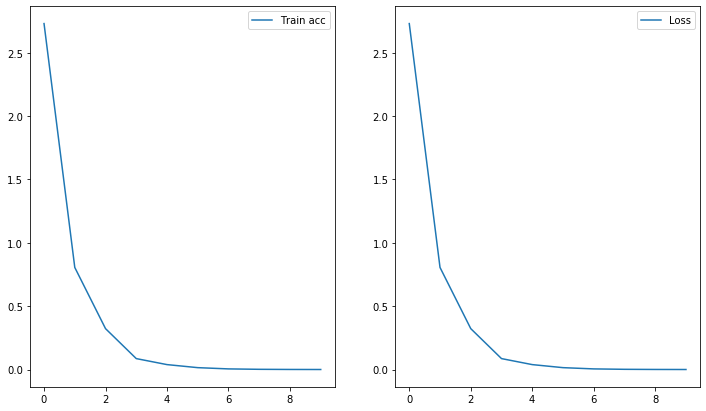

In [143]:
show_results(model, history);

In [144]:
history.history

{'loss': [2.7295164845185353,
  0.8053712636232376,
  0.3226957231760025,
  0.08624831642955541,
  0.03885015202686191,
  0.014847369212657214,
  0.004954882699530571,
  0.0017103184072766453,
  0.000603641958150547,
  0.0002140098778909305],
 'mse': [2.7295165,
  0.80537117,
  0.32269567,
  0.086248316,
  0.03885015,
  0.014847366,
  0.004954883,
  0.0017103184,
  0.00060364197,
  0.00021400987]}

In [154]:
x_test = sales_df.iloc[[3,7,15,22],206:306]
x_test = np.array(x_test)
x_test = x_test.reshape(1, x_test.shape[1], x_test.shape[0])
x_test

y_test = np.array(sales_df.iloc[[3,7,15,22],306:308])
y_test = y_test.reshape(1, y_test.shape[0] * y_test.shape[1])
y_test

array([[ 1,  0, 26, 19,  0,  3,  3,  3]], dtype=int64)

In [155]:
score = model.evaluate(x_test, y_test,
                       verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(score)

1/1 [==============================] - 0s 46ms/step
Test score: 109.06035614013672
Test accuracy: 109.06035614013672
[109.06035614013672, 109.06035614013672, 6.677715301513672, 1611344000.0]


In [156]:
model.predict(x_test)

array([[ 0.14571805,  5.235225  , -1.093161  , 16.646185  ,  7.6555266 ,
         8.171794  ,  2.2903514 , -1.3482724 ]], dtype=float32)

In [157]:
y_test

array([[ 1,  0, 26, 19,  0,  3,  3,  3]], dtype=int64)

[5.382826328277588, 1.0]